In [1]:
import pandas as pd

df = pd.read_csv('./bodyPerformance.csv')

df.head(6)

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B
5,36.0,F,165.4,55.40,22.0,64.0,119.0,23.8,21.0,27.0,153.0,B


In [2]:
df.isnull().sum()

age                        0
gender                     0
height_cm                  0
weight_kg                  0
body fat_%                 0
diastolic                  0
systolic                   0
gripForce                  0
sit and bend forward_cm    0
sit-ups counts             0
broad jump_cm              0
class                      0
dtype: int64

In [3]:
df.describe()

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
count,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000
mean,36.775106,168.559807,67.447316,23.240165,78.796842,130.234817,36.963877,15.209268,39.771224,190.129627
std,13.625639,8.426583,11.949666,7.256844,10.742033,14.713954,10.624864,8.456677,14.276698,39.868000
min,21.000000,125.000000,26.300000,3.000000,0.000000,0.000000,0.000000,-25.000000,0.000000,0.000000
25%,25.000000,162.400000,58.200000,18.000000,71.000000,120.000000,27.500000,10.900000,30.000000,162.000000
50%,32.000000,169.200000,67.400000,22.800000,79.000000,130.000000,37.900000,16.200000,41.000000,193.000000
75%,48.000000,174.800000,75.300000,28.000000,86.000000,141.000000,45.200000,20.700000,50.000000,221.000000
max,64.000000,193.800000,138.100000,78.400000,156.200000,201.000000,70.500000,213.000000,80.000000,303.000000


In [4]:
'''weight : 40-100
body fat : 8-45
diastolic : 50-100
systolic : 80-160
gripforce : 15-62
sit and bend : 0-30
sit up counts : 0-65
broadjump : 100-250'''

'weight : 40-100\nbody fat : 8-45\ndiastolic : 50-100\nsystolic : 80-160\ngripforce : 15-62\nsit and bend : 0-30\nsit up counts : 0-65\nbroadjump : 100-250'

In [5]:
'''df = df[
    (df['height_cm'].between(150 , 185)) &
    (df['weight_kg'].between(45 , 95)) &
    (df['body fat_%'].between(8 , 40)) &
    (df['diastolic'].between(60 , 100)) &
    (df['systolic'].between(100 , 160)) &
    (df['gripForce'].between(15 , 62)) &
    (df['sit and bend forward_cm'].between(0 , 30)) &
    (df['sit-ups counts'].between(10 , 65)) &
    (df['broad jump_cm'].between(100 , 250))
]'''

"df = df[\n    (df['height_cm'].between(150 , 185)) &\n    (df['weight_kg'].between(45 , 95)) &\n    (df['body fat_%'].between(8 , 40)) &\n    (df['diastolic'].between(60 , 100)) &\n    (df['systolic'].between(100 , 160)) &\n    (df['gripForce'].between(15 , 62)) &\n    (df['sit and bend forward_cm'].between(0 , 30)) &\n    (df['sit-ups counts'].between(10 , 65)) &\n    (df['broad jump_cm'].between(100 , 250))\n]"

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.2+ MB


In [7]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()

In [8]:
df['gender'] = encoder.fit_transform(df[['gender']])
df['class'] = encoder.fit_transform(df[['class']])
df

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,1.0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,2.0
1,25.0,1.0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,0.0
2,31.0,1.0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,2.0
3,32.0,1.0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,1.0
4,28.0,1.0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,1.0,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,2.0
13389,21.0,1.0,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,3.0
13390,39.0,1.0,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,0.0
13391,64.0,0.0,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,3.0


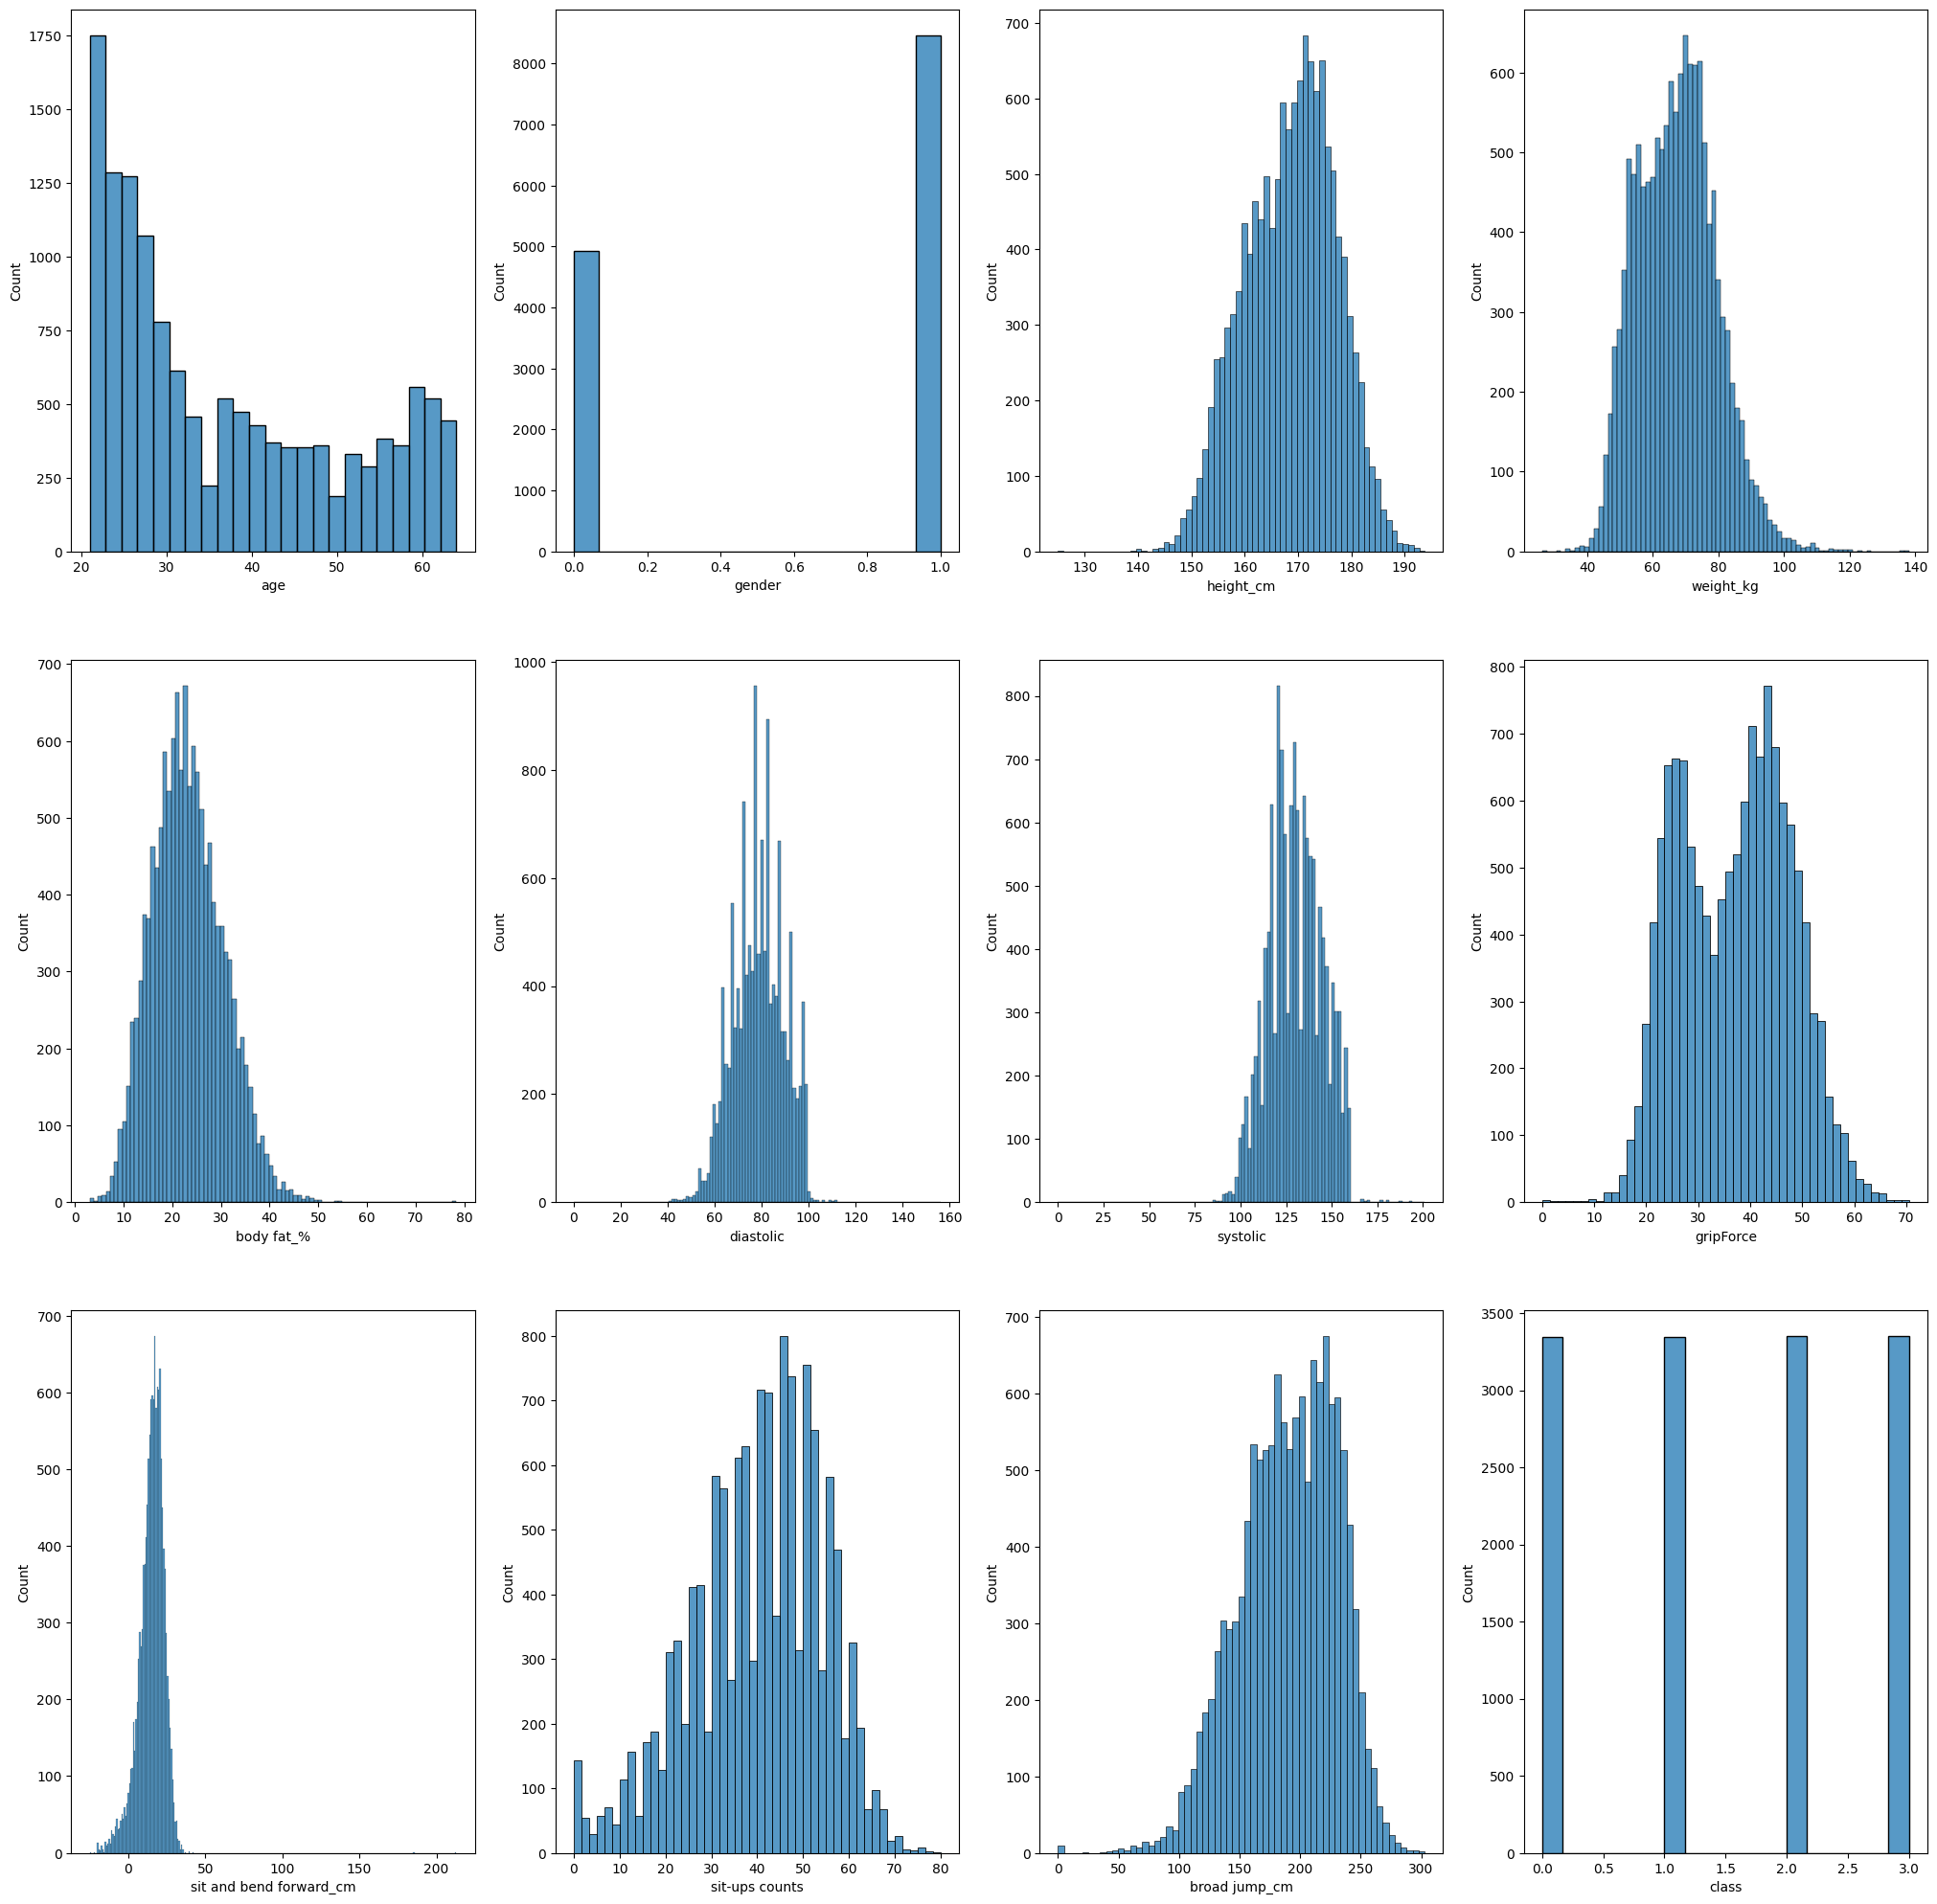

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(25 , 25))

for i, var in enumerate(df.columns):
    plt.subplot(3 , 4 , i+1)
    sns.histplot(df[var])

In [10]:
X = df.drop(['class'] , axis = 1)
Y = df['class']

In [11]:
from sklearn.model_selection import train_test_split

X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size=0.2 , random_state=51)

X_train.shape , Y_train.shape , X_test.shape , Y_test.shape

((10714, 11), (10714,), (2679, 11), (2679,))

In [12]:
from xgboost import XGBClassifier

In [13]:
XGBC = XGBClassifier(learning_rate = 0.1, max_depth = 10, n_estimators = 200)

In [14]:
XGBC.fit(X_train , Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [15]:
XGBC.score(X_test , Y_test)

0.7364688316536021

In [16]:
'''from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [20 , 50, 100 , 200],
    'max_depth': [3, 6, 10 , 15],
    'learning_rate': [0.01, 0.1, 0.3 , 0.5]
}

grid_search = GridSearchCV(XGBClassifier() , param_grid , cv= 10 , scoring = 'accuracy')

grid_search.fit(X_train , Y_train)

print('Best params:', grid_search.best_params_ )
print('Best score:' , grid_search.best_score_)'''

"from sklearn.model_selection import GridSearchCV\n\nparam_grid = {\n    'n_estimators': [20 , 50, 100 , 200],\n    'max_depth': [3, 6, 10 , 15],\n    'learning_rate': [0.01, 0.1, 0.3 , 0.5]\n}\n\ngrid_search = GridSearchCV(XGBClassifier() , param_grid , cv= 10 , scoring = 'accuracy')\n\ngrid_search.fit(X_train , Y_train)\n\nprint('Best params:', grid_search.best_params_ )\nprint('Best score:' , grid_search.best_score_)"

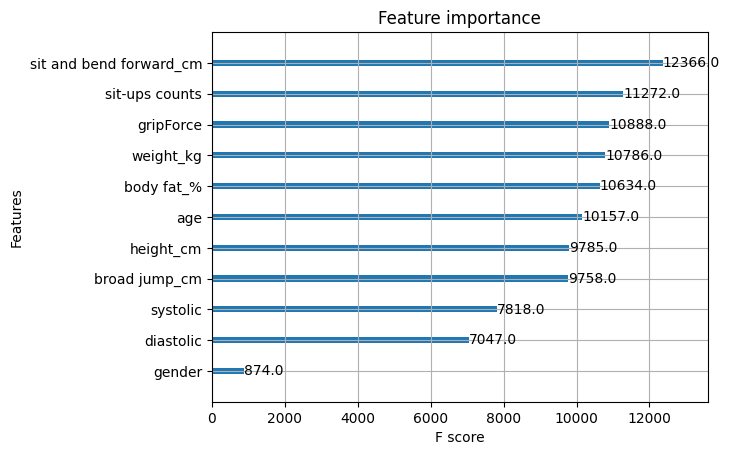

In [17]:
import xgboost as xgb
import matplotlib.pyplot as plt

xgb.plot_importance(XGBC)
plt.show()

In [18]:
from sklearn.metrics import classification_report

Y_pred = XGBC.predict(X_test)
report = classification_report(Y_test,Y_pred)

print(report)

              precision    recall  f1-score   support

         0.0       0.70      0.88      0.78       647
         1.0       0.63      0.58      0.60       662
         2.0       0.72      0.67      0.69       684
         3.0       0.91      0.81      0.86       686

    accuracy                           0.74      2679
   macro avg       0.74      0.74      0.73      2679
weighted avg       0.74      0.74      0.74      2679



<Axes: >

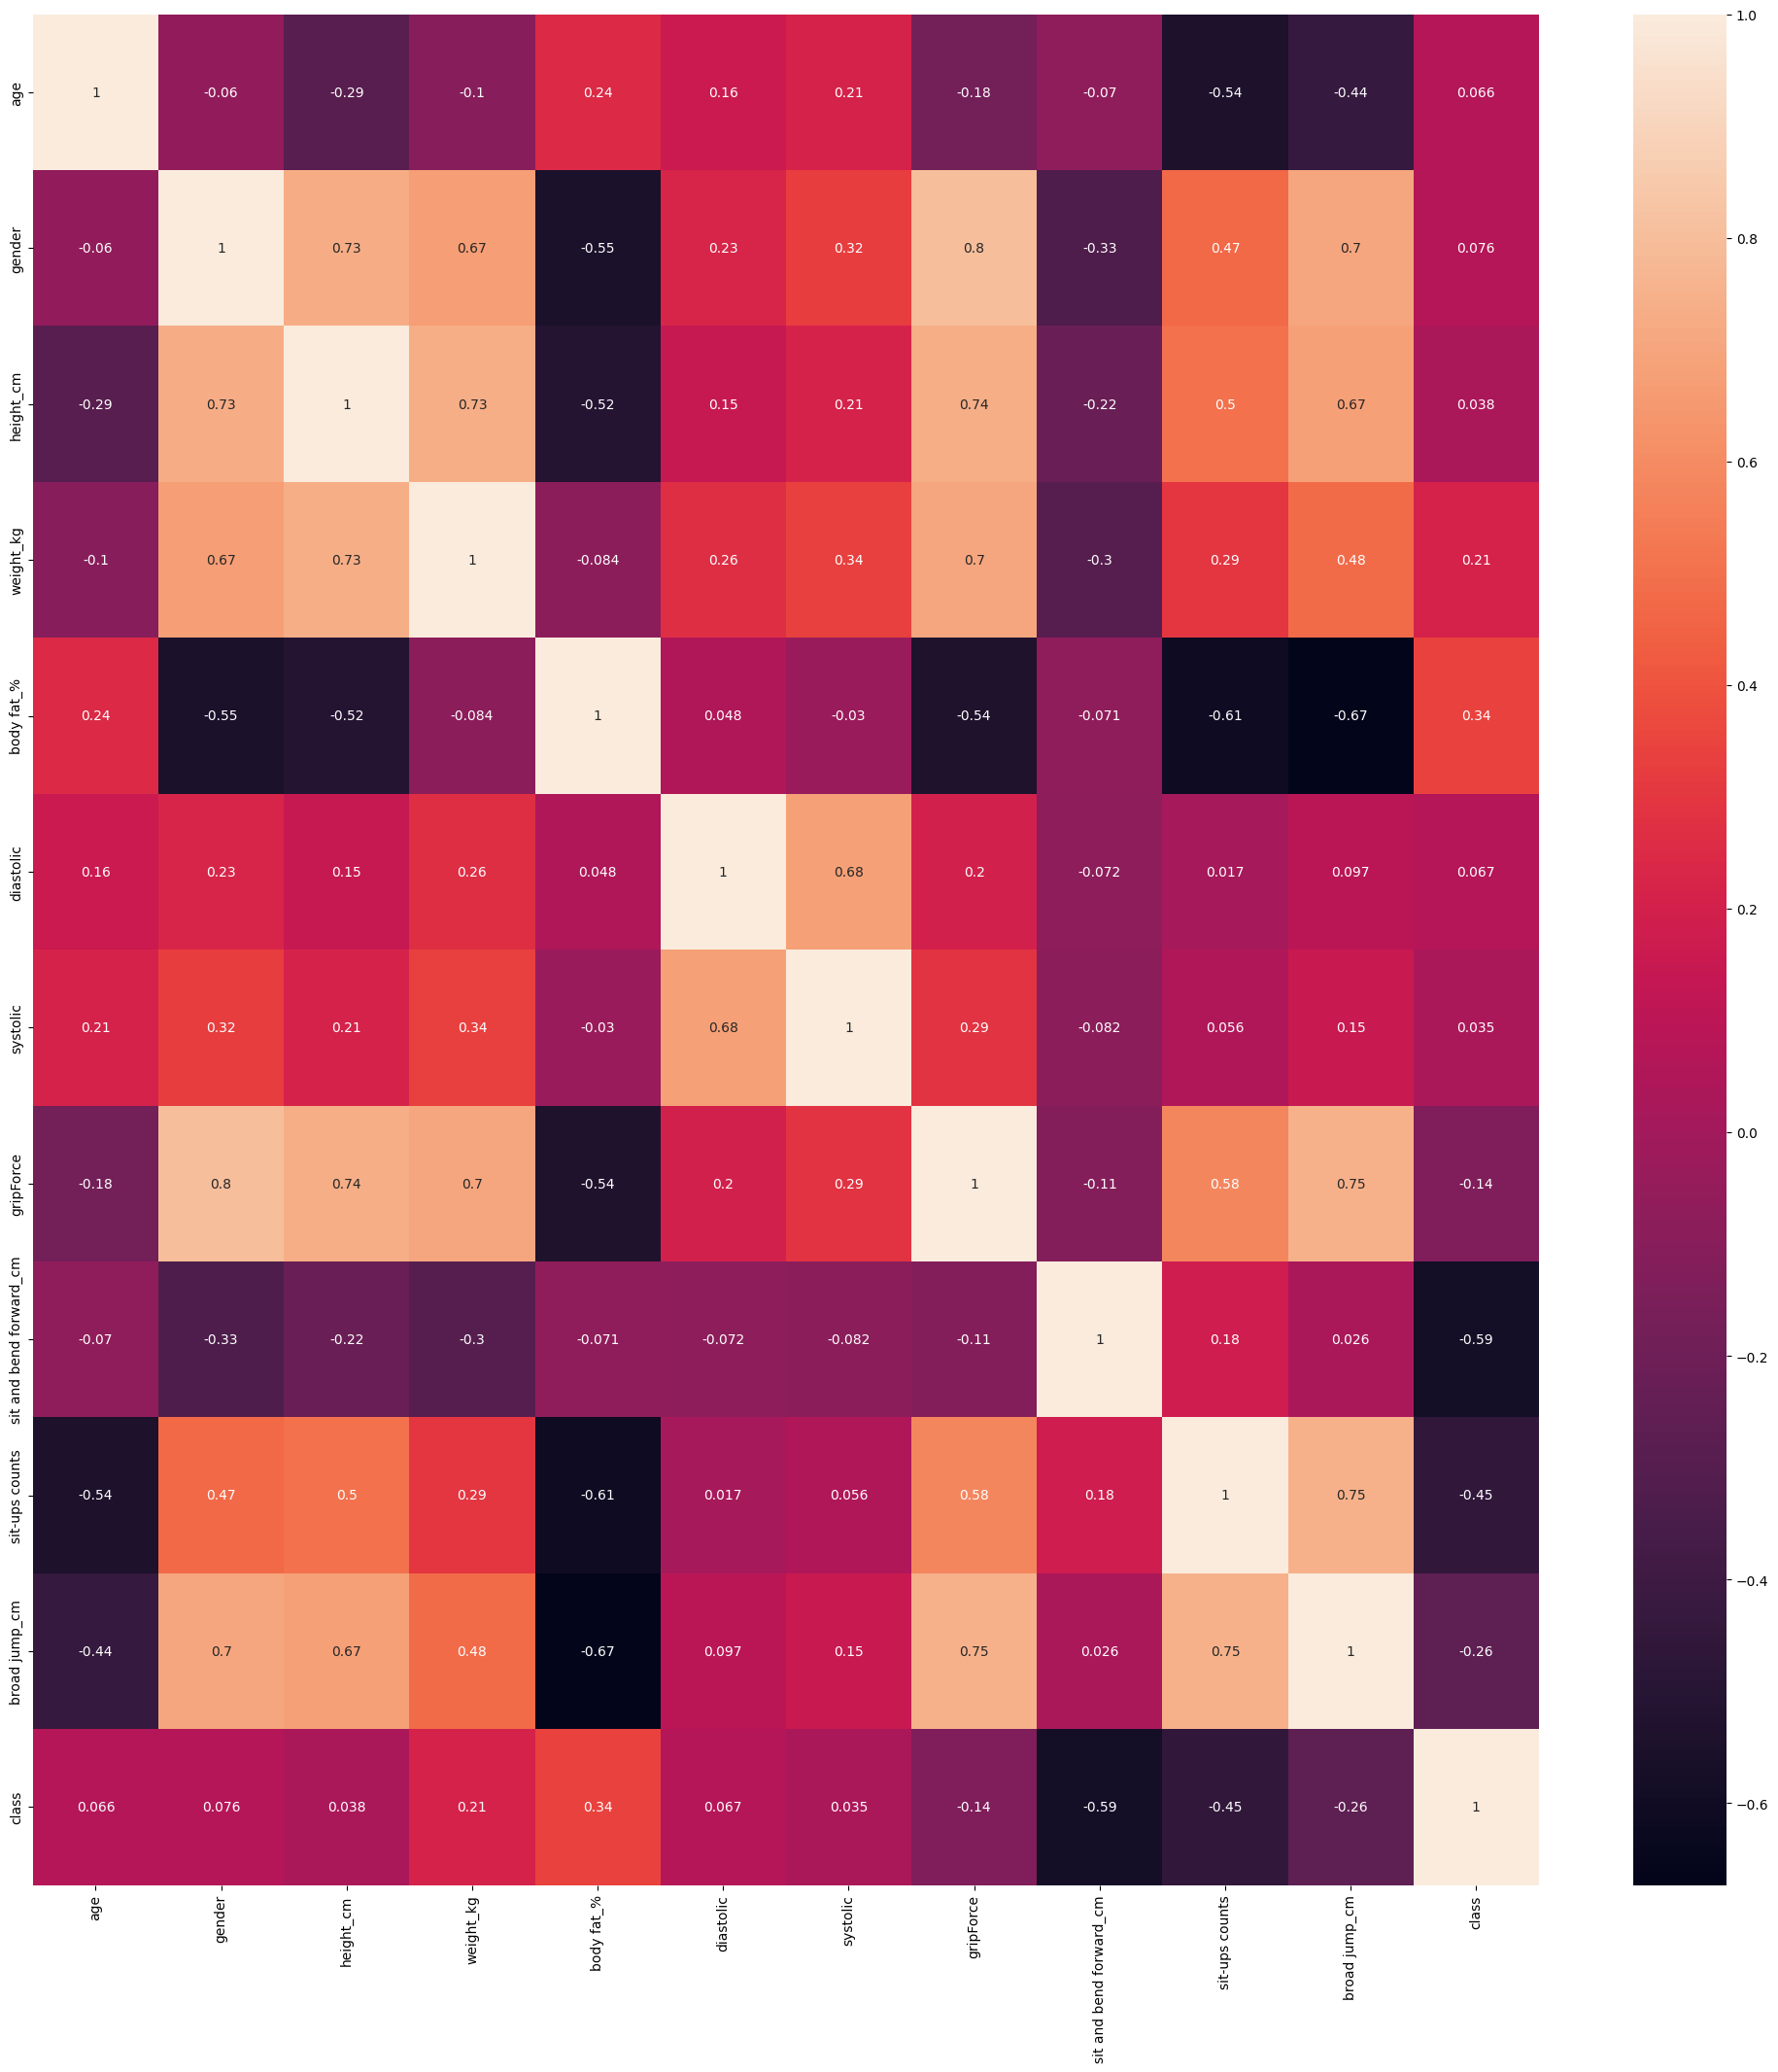

In [19]:
plt.figure(figsize=(25,25))

corr = df.corr()

sns.heatmap(corr , annot = True)

In [20]:
import pickle

with open('trained_model.pkl' , 'wb') as file:
    pickle.dump(XGBC , file)